# Data Cleaning

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import csv
import datetime as dt
import collections
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

In [5]:
frame = pd.read_csv("flavors_of_cacao.csv")
frame.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [6]:
frame.describe()

,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


As we can see from the dataset head, there are 3 numeric columns and one date columns. Because the date here only contains year, we can use it as integer as to analyze the data.

In [7]:
frame.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1765    False
1766    False
1767    False
1768    False
1769    False
1770    False
1771    False
1772    False
1773    False
1774    False
1775    False
1776    False
1777    False
1778    False
1779    False
1780    False
1781    False
1782    False
1783    False
1784    False
1785    False
1786    False
1787    False
1788    False
1789    False
1790    False
1791    False
1792    False
1793    False
1794    False
Length: 1795, dtype: bool

In [8]:
frame.columns = ['company', 'specific bean origin', 'ref', 'review date', 'cocoa percent','company location','rating','bean type','broad bean origin']

In [9]:
frame["company"].isnull().value_counts()

False    1795
Name: company, dtype: int64

In [10]:
frame["specific bean origin"].isnull().value_counts()

False    1795
Name: specific bean origin, dtype: int64

In [11]:
frame["ref"].isnull().value_counts()

False    1795
Name: ref, dtype: int64

In [12]:
frame["review date"].isnull().value_counts()

False    1795
Name: review date, dtype: int64

In [13]:
frame["cocoa percent"].isnull().value_counts()

False    1795
Name: cocoa percent, dtype: int64

In [14]:
frame["company location"].isnull().value_counts()

False    1795
Name: company location, dtype: int64

In [15]:
frame["rating"].isnull().value_counts()

False    1795
Name: rating, dtype: int64

In [16]:
frame["bean type"].isnull().value_counts()

False    1794
True        1
Name: bean type, dtype: int64

In [17]:
frame["broad bean origin"].isnull().value_counts()

False    1794
True        1
Name: broad bean origin, dtype: int64

In [18]:
frame['bean type']=frame['bean type'].fillna('Unknown')
frame['bean type'].isnull().value_counts()

False    1795
Name: bean type, dtype: int64

In [19]:
frame['broad bean origin']=frame['broad bean origin'].fillna('Unknown')
frame['broad bean origin'].isnull().value_counts()

False    1795
Name: broad bean origin, dtype: int64

In [20]:
frame.dtypes

company                  object
specific bean origin     object
ref                       int64
review date               int64
cocoa percent            object
company location         object
rating                  float64
bean type                object
broad bean origin        object
dtype: object

Now parse cocoa percent column to numeric:

In [21]:
frame['cocoa percent'] = frame['cocoa percent'].astype(str)
frame['cocoa percent'] = frame['cocoa percent'].map(lambda x: x.rstrip('%'))

In [22]:
frame['cocoa percent'] = pd.to_numeric(frame['cocoa percent'])

In [23]:
frame.dtypes

company                  object
specific bean origin     object
ref                       int64
review date               int64
cocoa percent           float64
company location         object
rating                  float64
bean type                object
broad bean origin        object
dtype: object

In [24]:
frame.describe(include='all')

,company,specific bean origin,ref,review date,cocoa percent,company location,rating,bean type,broad bean origin
count,1795,1795,1795.000000,1795.000000,1795.000000,1795,1795.000000,1795,1795
unique,416,1039,NaN,NaN,NaN,60,NaN,42,101
top,Soma,Madagascar,NaN,NaN,NaN,U.S.A.,NaN,,Venezuela
freq,47,57,NaN,NaN,NaN,764,NaN,887,214
mean,NaN,NaN,1035.904735,2012.325348,71.698329,NaN,3.185933,NaN,NaN
std,NaN,NaN,552.886365,2.927210,6.323118,NaN,0.478062,NaN,NaN
min,NaN,NaN,5.000000,2006.000000,42.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,576.000000,2010.000000,70.000000,NaN,2.875000,NaN,NaN
50%,NaN,NaN,1069.000000,2013.000000,70.000000,NaN,3.250000,NaN,NaN
75%,NaN,NaN,1502.000000,2015.000000,75.000000,NaN,3.500000,NaN,NaN


Because the original dataset does not have any description on "ref" column, here we need to do some experiments to understand what it means.

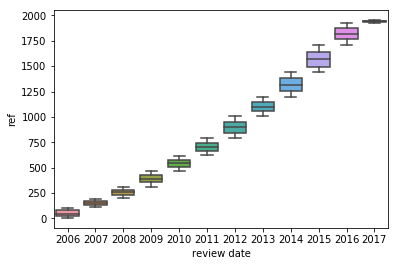

In [25]:
sns.boxplot(data=frame,x='review date',y='ref')

There is a significant increasing tendency of ref over the years. So I assume that ref means the number of referees involved in the rating.

## Assumption

Now the data is cleaned. Before we do any clustering or build any models, let's make an assumption: is there any significant relationship between rating and cocoa percent? Although the answer seems possitive at the first glance, we need do some analysis in order to answer this question.

In [26]:
frame.corr(method='pearson',min_periods=1)

,ref,review date,cocoa percent,rating
ref,1.000000,0.985076,0.037791,0.101030
review date,0.985076,1.000000,0.038177,0.099846
cocoa percent,0.037791,0.038177,1.000000,-0.164820
rating,0.101030,0.099846,-0.164820,1.000000


The coef seems not very large, but it's the largest among all the cross-column values.

## Data Clustering

First, use pairplot to find if there is any significant relationship.

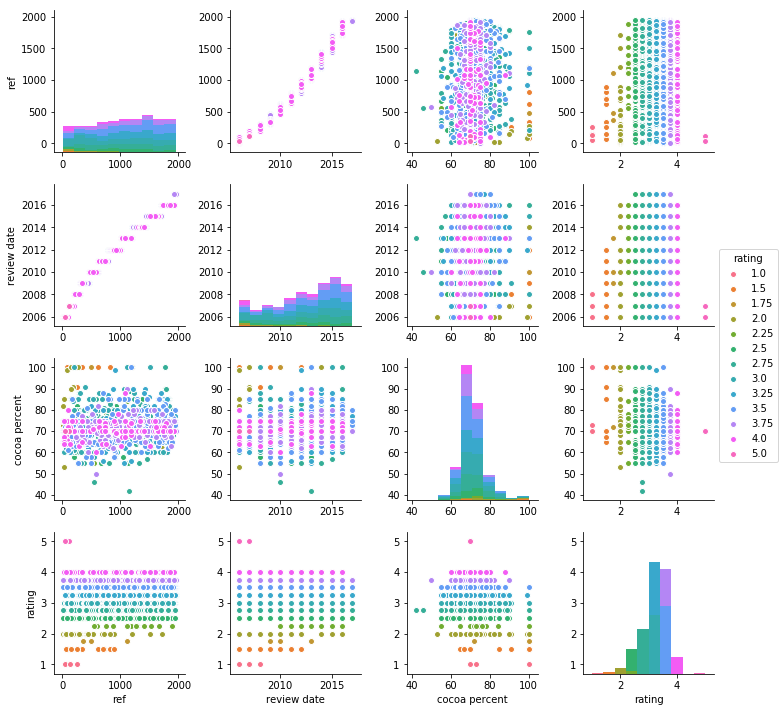

In [27]:
sns.pairplot(frame, hue="rating")
plt.show()

In [28]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

## cocoa percent & rating

### 1. Use K-means Estimator

Counter({0: 1795})


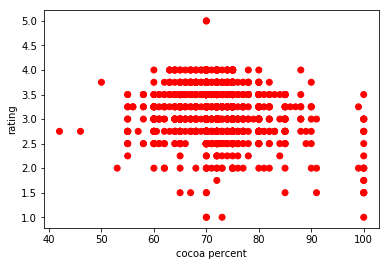

In [29]:
from collections import Counter
estimator = KMeans(n_clusters=1)
X = frame[["cocoa percent", "rating"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"],frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

Counter({1: 1561, 0: 234})


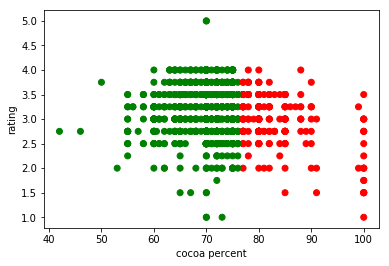

In [30]:
from collections import Counter
estimator = KMeans(n_clusters=2)
X = frame[["cocoa percent", "rating"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"],frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

Counter({4: 980, 1: 387, 0: 244, 3: 162, 2: 22})


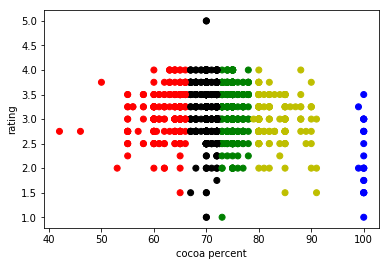

In [31]:
from collections import Counter
estimator = KMeans(n_clusters=5)
X = frame[["cocoa percent", "rating"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"],frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

### 2. Use DBSCAN Estimator

#### 1) Keep min_samples value and change eps

Counter({-1: 536, 2: 170, 5: 116, 1: 110, 3: 101, 0: 83, 10: 49, 31: 47, 4: 43, 16: 39, 19: 38, 26: 38, 13: 35, 7: 32, 9: 31, 23: 24, 28: 24, 8: 23, 21: 23, 27: 21, 11: 18, 29: 18, 18: 17, 12: 16, 24: 16, 14: 14, 6: 13, 34: 13, 15: 12, 30: 12, 17: 11, 20: 11, 22: 11, 25: 10, 32: 10, 33: 10})


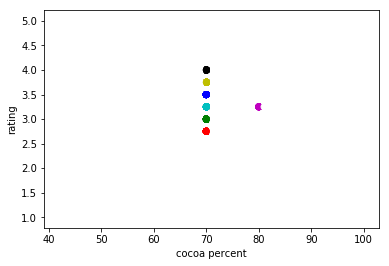

In [32]:
# Fit a DBSCAN
estimator = DBSCAN(eps=0.2, min_samples=10)
X = frame[["rating", "cocoa percent"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"], frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

Counter({1: 668, 4: 284, 6: 222, -1: 87, 7: 77, 3: 72, 11: 46, 2: 44, 8: 35, 9: 34, 13: 33, 14: 31, 19: 26, 10: 23, 16: 23, 12: 19, 5: 16, 15: 16, 17: 16, 18: 12, 0: 11})


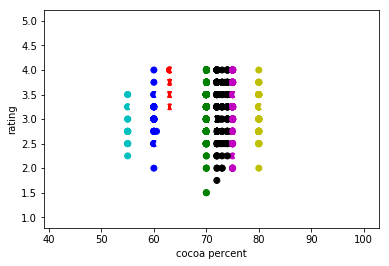

In [33]:
# Fit a DBSCAN
estimator = DBSCAN(eps=0.5, min_samples=10)
X = frame[["rating", "cocoa percent"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"], frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

Counter({1: 668, 4: 284, 6: 222, 7: 78, 3: 72, -1: 62, 2: 50, 11: 47, 8: 36, 9: 34, 13: 33, 14: 31, 19: 26, 10: 23, 16: 23, 12: 20, 15: 17, 17: 17, 5: 16, 18: 14, 0: 12, 20: 10})


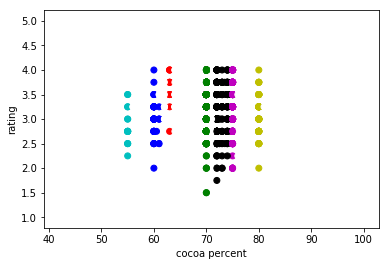

In [34]:
# Fit a DBSCAN
estimator = DBSCAN(eps=0.8, min_samples=10)
X = frame[["rating", "cocoa percent"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"], frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

Counter({0: 1678, 2: 41, -1: 37, 3: 21, 1: 18})


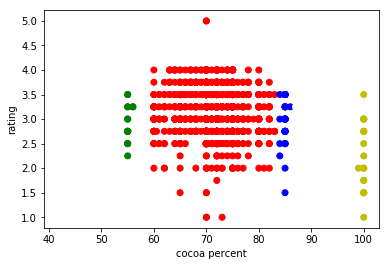

In [35]:
# Fit a DBSCAN
estimator = DBSCAN(eps=1.0, min_samples=10)
X = frame[["rating", "cocoa percent"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"], frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

Counter({0: 1742, 1: 27, 2: 22, -1: 4})


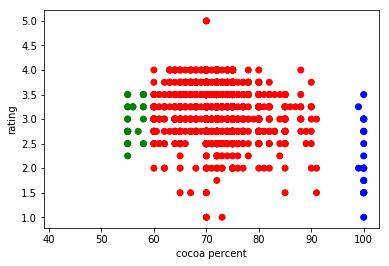

In [36]:
# Fit a DBSCAN
estimator = DBSCAN(eps=1.4, min_samples=10)
X = frame[["rating", "cocoa percent"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"], frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

DBSCAN estimator creates a better slot for rating and cocoa percent when eps=1.0.

#### 1) Keep eps=1.0 and change min_samples value

Counter({0: 1741, 3: 21, 1: 18, 5: 8, 2: 1, 4: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1})


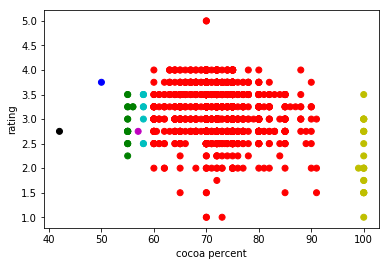

In [37]:
# Fit a DBSCAN
estimator = DBSCAN(eps=1.0, min_samples=1)
X = frame[["rating", "cocoa percent"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"], frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

Counter({0: 1720, 3: 21, 2: 18, 4: 11, 1: 9, -1: 8, 5: 8})


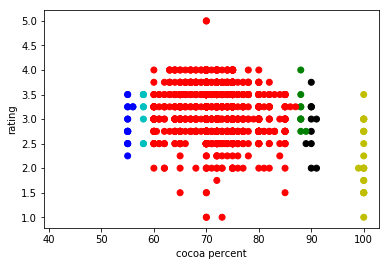

In [38]:
# Fit a DBSCAN
estimator = DBSCAN(eps=1.0, min_samples=5)
X = frame[["rating", "cocoa percent"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"], frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

Counter({0: 1719, 3: 21, 2: 18, 1: 10, 4: 10, -1: 9, 5: 8})


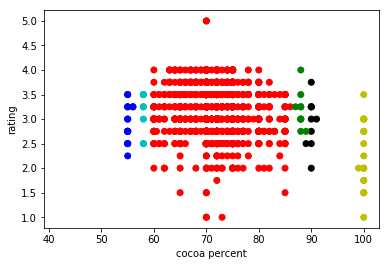

In [39]:
# Fit a DBSCAN
estimator = DBSCAN(eps=1.0, min_samples=8)
X = frame[["rating", "cocoa percent"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"], frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

Counter({0: 1678, 2: 41, -1: 37, 3: 21, 1: 18})


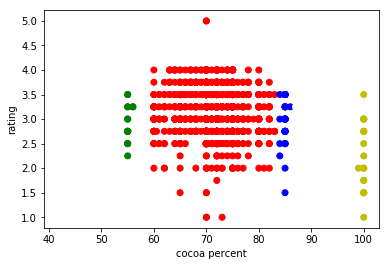

In [40]:
# Fit a DBSCAN
estimator = DBSCAN(eps=1.0, min_samples=10)
X = frame[["rating", "cocoa percent"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"], frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

Counter({0: 1519, 2: 97, -1: 65, 1: 54, 3: 40, 4: 20})


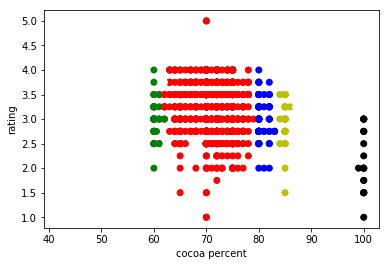

In [41]:
# Fit a DBSCAN
estimator = DBSCAN(eps=1.0, min_samples=20)
X = frame[["rating", "cocoa percent"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"], frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

Counter({0: 1510, -1: 115, 2: 78, 1: 52, 3: 40})


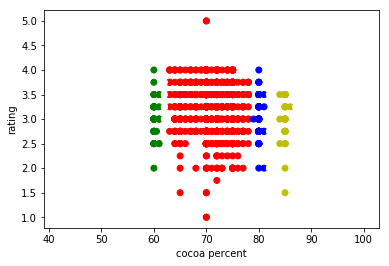

In [42]:
# Fit a DBSCAN
estimator = DBSCAN(eps=1.0, min_samples=30)
X = frame[["rating", "cocoa percent"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(frame["cocoa percent"], frame["rating"], c=colors)
plt.xlabel("cocoa percent")
plt.ylabel("rating")
plt.show()

We can see that when eps=1.0, min_samples=20, it generates the best clustering result.

### Q & A
  1. Do the clustering methods generate the same clusters? No
  2. Does scaling effect the clustering?  Yes
  3. Does the clustering produce interesting groupings?  There is no significant groups, but DBSCAN estimator do clusters obvious groups.

## Linear Regression

In this part we are going to find out the significance of the relationship between cocoa percent and rating.

In [43]:
from __future__ import print_function
%matplotlib inline
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


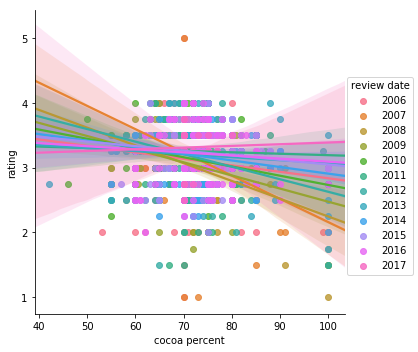

In [44]:
sns.lmplot(y="rating", x="cocoa percent", data=frame,  hue="review date")
plt.show()

From the plot, it seems that there is no significant coef, but this two columns are negatively correlated. Now let's do the math part.

In [45]:
X = frame[["cocoa percent"]]
y = frame[["rating"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[ 4.07938814] [[-0.01246131]]


In [46]:
# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 5.132e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        12:16:05   Log-Likelihood:                -1606.2
No. Observations:                1795   AIC:                             3214.
Df Residuals:                    1794   BIC:                             3220.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cocoa percent     0.0440      0.000    226.533      0.000       0.044       0.044
==============================================================================
Omnibus:                      361.096   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              974.272
Skew:                          -1.055   Prob(JB):                    2.75e-212
Kurtosis:                       5.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

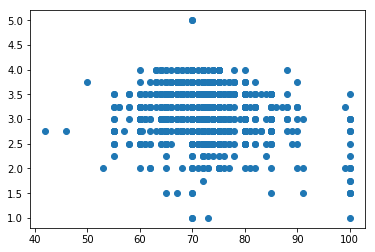

In [47]:
X = frame[["cocoa percent"]]
y = frame[["rating"]]
plt.plot(X, y, "o")

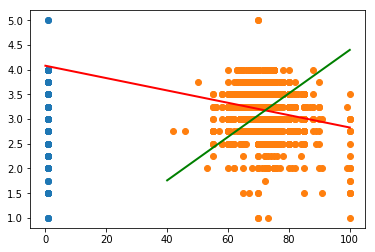

In [48]:
X = sm.add_constant(X) #  Our model needs an intercept so we add a column of 1s:
plt.plot(X, y, "o")
x2 = np.linspace(0, 100, 20)
y2 = 4.07938814 + (-0.0125*x2)
plt.plot(x2, y2, lw=2, color="r")
x2 = np.linspace(40, 100, 50)
y2 = (0.0440*x2)
plt.plot(x2, y2, lw=2, color="g")
plt.show()

In [49]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     50.07
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           2.12e-12
Time:                        12:16:05   Log-Likelihood:                -1197.0
No. Observations:                1795   AIC:                             2398.
Df Residuals:                    1793   BIC:                             2409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0794      0.127     32.183      0.000       3.831       4.328
cocoa percent    -0.0125      0.002     -7.076      0.000      -0.016      -0.009
==============================================================================
Omnibus:                       99.499   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.795
Skew:                          -0.508   Prob(JB):                     8.85e-30
Kurtosis:                       3.869   Cond. No.                         820.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const            4.079388
cocoa percent   -0.012461
dtype: float64
R2:  0.0271656909521


### Multiple Regression

In [51]:
frame.columns = ['company', 'specific_bean_origin', 'ref', 'year', 'cocoa_percent','company_location','rating','bean_type','broad_bean_origin']

In [52]:
percent_origin_model = ols("rating ~ cocoa_percent + year -1", data=frame).fit()
percent_origin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 4.108e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        12:16:05   Log-Likelihood:                -1194.7
No. Observations:                1795   AIC:                             2393.
Df Residuals:                    1793   BIC:                             2404.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cocoa_percent    -0.0126      0.002     -7.168      0.000      -0.016      -0.009
year              0.0020   6.29e-05     32.295      0.000       0.002       0.002
==============================================================================
Omnibus:                       95.800   Durbin-Watson:                   1.452
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.110
Skew:                          -0.496   Prob(JB):                     1.52e-28
Kurtosis:                       3.853   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
percent_origin_model_A = ols("rating ~ cocoa_percent + year + cocoa_percent : year -1", data=frame).fit()
percent_origin_model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 2.767e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        12:16:05   Log-Likelihood:                -1185.3
No. Observations:                1795   AIC:                             2377.
Df Residuals:                    1792   BIC:                             2393.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
cocoa_percent         -0.4734      0.106     -4.476      0.000      -0.681      -0.266
year                   0.0020   6.26e-05     32.458      0.000       0.002       0.002
cocoa_percent:year     0.0002   5.25e-05      4.358      0.000       0.000       0.000
==============================================================================
Omnibus:                       66.537   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.056
Skew:                          -0.393   Prob(JB):                     2.06e-19
Kurtosis:                       3.731   Cond. No.                     1.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
percent_origin_model_A = ols("rating ~ cocoa_percent + year -1", data=frame).fit()
percent_origin_model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 4.108e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        12:16:05   Log-Likelihood:                -1194.7
No. Observations:                1795   AIC:                             2393.
Df Residuals:                    1793   BIC:                             2404.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cocoa_percent    -0.0126      0.002     -7.168      0.000      -0.016      -0.009
year              0.0020   6.29e-05     32.295      0.000       0.002       0.002
==============================================================================
Omnibus:                       95.800   Durbin-Watson:                   1.452
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.110
Skew:                          -0.496   Prob(JB):                     1.52e-28
Kurtosis:                       3.853   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multi-colinearity

In [55]:
frame.corr()

,ref,year,cocoa_percent,rating
ref,1.000000,0.985076,0.037791,0.101030
year,0.985076,1.000000,0.038177,0.099846
cocoa_percent,0.037791,0.038177,1.000000,-0.164820
rating,0.101030,0.099846,-0.164820,1.000000


### Regularization

In [56]:
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

In [57]:
X = frame[["cocoa_percent"]]
y = frame[["rating"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

Text(0.5,1,'Rating vs Predicted Rating: $Y_i$ vs $\\hat{y}_i$')

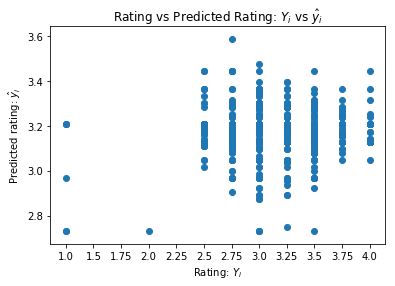

In [58]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Rating: $Y_i$")
plt.ylabel("Predicted rating: $\hat{y}_i$")
plt.title("Rating vs Predicted Rating: $Y_i$ vs $\hat{y}_i$")

In [59]:
print (linreg.intercept_)
print (linreg.coef_)

[ 4.31266405]
[[-0.01580957]]


In [60]:
np.median(y_test)

3.25

In [61]:
y_m=np.mean(y_test)

In [62]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.46909056960968548

In [63]:
rmse/y_m

rating    0.146757
dtype: float64

#### Compare to Previous Model

In [64]:
y_null = np.zeros_like(y_test, dtype=float)
#y_null.fill(y_test.mean())
#y_null[0:33]

In [65]:
y_null_rmse =np.sqrt(metrics.mean_squared_error(y_test, y_null))
y_null_rmse

3.2305503295498856

In [66]:
y_null_rmse/y_test.mean()

rating    1.010691
dtype: float64

### K-Fold Cross-Validation

In [67]:
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
import sklearn

In [68]:
sklearn.model_selection.KFold(n_splits=3, shuffle=False, random_state=None)

KFold(n_splits=3, random_state=None, shuffle=False)

In [69]:
# RMSE using 5-fold cross-validation
kf = KFold(len(X), n_folds=5)

In [70]:
for train,test in kf:
    print (train)
    print (test)

[ 359  360  361 ..., 1792 1793 1794]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 2

In [71]:
frame.head()

,company,specific_bean_origin,ref,year,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [72]:
X = frame[['cocoa_percent']]
y = frame['rating']

X_train, X_test, y_train, y_test = train_test_split(frame, y, test_size= .4, random_state=0)

In [73]:
X.shape

(1795, 1)

In [74]:
scores = []
for train_index, test_index in kf:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    linreg.fit(X_train, y_train)
    scores.append(metrics.mean_squared_error(y[test_index], linreg.predict(X[test_index])))
scores

KeyError: '[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17\n  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35\n  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53\n  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71\n  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89\n  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107\n 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125\n 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143\n 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161\n 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179\n 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197\n 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215\n 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233\n 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251\n 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269\n 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287\n 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305\n 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323\n 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341\n 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358] not in index'

In [ ]:
scores = []
for train, test in kf:
    linreg.fit(X[train], y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y[test], linreg.predict(X[test]))))
scores

In [ ]:
np.mean(scores)

In [ ]:
np.median(scores)

In [ ]:
np.std(scores)

In [ ]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)

In [ ]:
show_stats('Simple Linear Regression',rmse ,np.mean(scores))

### Q & A

* Is the relationship significant?  
> No  
* Are any model assumptions violated?  
> Yes. I assumed that there was a significant relationship between rating and cocoa percent.  
* Is there any multi-colinearity in the model?  
> ref is highly related to year, which is the only significant multi-colinearity relationship.
* In the multiple regression models are predictor variables independent of all the other predictor variables?  
> Yes
* In the multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.   
> Cocoa percent is more significant than year, but it's not very related to rating either.
* Does the model make sense?  
> Yes. It analyzes how cocoa percent of a chocolate bar influence its rating, and how rating is changed over year.
* Cross-validate the model. How well did it do?  
> 
* Does regularization help with creating models that validate better on out of sample data?  
> Not really.

## Logestic Regression

In [87]:
temp = frame.copy()

In [88]:
temp.describe()

,ref,year,cocoa_percent,rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,71.698329,3.185933
std,552.886365,2.927210,6.323118,0.478062
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,2.875000
50%,1069.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


In [89]:
temp['cocoa_percent']=np.floor(temp['cocoa_percent'])

In [90]:
temp['rating']=(np.floor(temp['rating']/10))*10

In [91]:
temp['cocoa_percent']=np.where(temp['cocoa_percent'] <= 70, 0, temp['cocoa_percent'])
#temp['cocoa_percent']=np.where(np.logical_and(temp['cocoa_percent']>45, temp['cocoa_percent']<=55), 1, temp['cocoa_percent'])
#temp['cocoa_percent']=np.where(np.logical_and(temp['cocoa_percent']>55, temp['cocoa_percent']<=65), 2, temp['cocoa_percent'])
temp['cocoa_percent']=np.where(temp['cocoa_percent'] > 70, 1, temp['cocoa_percent'])

In [92]:
temp['rating']=np.where(temp['rating'] >= 3.0, 4, temp['rating'])
temp['rating']=np.where(temp['rating'] < 3.0, 3, temp['rating'])
#temp['rating']=np.where(temp['rating'] < 3.0 and temp['rating'] >= 2.0, 2, temp['rating'])
#temp['rating']=np.where(temp['rating'] < 2.0, 1, temp['rating'])

In [93]:
temp.describe()

,ref,year,cocoa_percent,rating
count,1795.000000,1795.000000,1795.000000,1795.0
mean,1035.904735,2012.325348,0.442897,3.0
std,552.886365,2.927210,0.496867,0.0
min,5.000000,2006.000000,0.000000,3.0
25%,576.000000,2010.000000,0.000000,3.0
50%,1069.000000,2013.000000,0.000000,3.0
75%,1502.000000,2015.000000,1.000000,3.0
max,1952.000000,2017.000000,1.000000,3.0


In [94]:
logistic_model = sm.Logit(temp['cocoa_percent'], temp['rating']).fit()
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.686611
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          cocoa_percent   No. Observations:                 1795
Model:                          Logit   Df Residuals:                     1794
Method:                           MLE   Df Model:                            0
Date:                Fri, 16 Feb 2018   Pseudo R-squ.:                   0.000
Time:                        12:17:38   Log-Likelihood:                -1232.5
converged:                       True   LL-Null:                       -1232.5
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rating        -0.0765      0.016     -4.828      0.000      -0.108      -0.045
==============================================================================
"""

In [95]:
a = [1,2,3]
b = [2,2,5]
print (np.logical_and(a[0]<b[0],a[1]==b[1]))

True


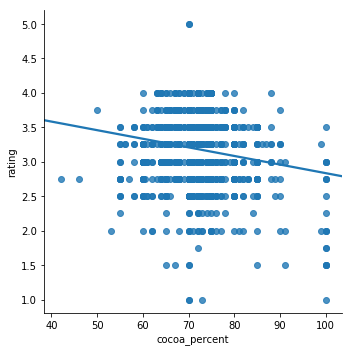

In [96]:
sns.lmplot(x='cocoa_percent', y='rating', data=frame, ci=None)

* Is the relationship significant?  
> Not really.
* Are any model assumptions violated?  
> Yes.
* Cross-validate the model. How well did it do?  
> 

### Cross Validation

In [97]:
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
import sklearn

# Conclusion

At first I expected a significant relationship between rating and other columns, for example, cocoa percent may have strong influence on rating of a chocolate bar. But after the analysis, I found that the data doesn't show any obvious relationship. There might be some reasons. FIrst, referees are professional enough that they don't have any preference when judging the chocolate bar. And we can see that the data can be traversed to 2006, which is relatively early. At that time, the rating system might not be that completed, and the data mignt not be very accurate. These reasons can all affect the result.